In [131]:
import pandas as pd
import numpy as np
  

In [132]:
data=pd.read_csv('customers.csv')

In [133]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [134]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [135]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [136]:
data[['Milk']][data.Channel==1].mean()

Milk    3451.724832
dtype: float64

In [137]:
data[['Milk']][data.Channel==2].mean()

Milk    10716.5
dtype: float64

In [138]:
data[['Grocery']][data.Channel==1].mean()

Grocery    3962.137584
dtype: float64

In [139]:
data[['Grocery']][data.Channel==2].mean()

Grocery    16322.852113
dtype: float64

In [140]:
data[['Fresh']][data.Channel==1].mean()

Fresh    13475.560403
dtype: float64

In [141]:
data[['Fresh']][data.Channel==2].mean()

Fresh    8904.323944
dtype: float64

In [142]:
data[['Frozen']][data.Channel==1].mean()

Frozen    3748.251678
dtype: float64

In [143]:
data[['Frozen']][data.Channel==2].mean()

Frozen    1652.612676
dtype: float64

In [144]:
data[['Detergents_Paper']][data.Channel==1].mean()

Detergents_Paper    790.560403
dtype: float64

In [145]:
data[['Detergents_Paper']][data.Channel==2].mean()

Detergents_Paper    7269.507042
dtype: float64

In [146]:
data[['Delicatessen']][data.Channel==1].mean()

Delicatessen    1415.956376
dtype: float64

In [147]:
data[['Delicatessen']][data.Channel==2].mean()

Delicatessen    1753.43662
dtype: float64

In [160]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [170,340,420]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,260,8675,13430,1116,7015,323
1,381,4025,9670,388,7271,1371
2,4456,5266,13227,25,6818,1393


In [161]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

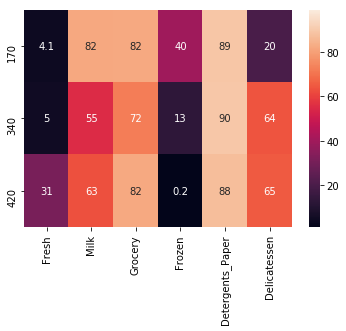

In [174]:
percentiles=data.rank(pct=True)
percentiles=100*percentiles.round(decimals=3)
percentiles=percentiles.iloc[indices]
import seaborn as sns
%matplotlib inline
sns.heatmap(percentiles,vmin=1,vmax=99,annot=True)

In [149]:
new_data = data.drop('Grocery',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Grocery'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Grocery'])
print "R^2 score is:",score

R^2 score is: 0.947382017234


In [150]:
new_data = data.drop('Delicatessen',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Delicatessen'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Delicatessen'])
print "R^2 score is:",score

R^2 score is: 0.397525146526


In [151]:
new_data = data.drop('Frozen',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Frozen'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Frozen'])
print "R^2 score is:",score

R^2 score is: 0.696138633606


In [152]:
new_data = data.drop('Milk',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Milk'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Milk'])
print "R^2 score is:",score

R^2 score is: 0.876516539712


In [153]:
new_data = data.drop('Fresh',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Fresh'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Fresh'])
print "R^2 score is:",score

R^2 score is: 0.652247241417


In [154]:
new_data = data.drop('Detergents_Paper',axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Detergents_Paper'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor=regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(new_data,data['Detergents_Paper'])
print "R^2 score is:",score

R^2 score is: 0.937723892271


In [155]:
data.drop(['Channel','Region'],inplace=True,axis=1)
log_data=np.log(data)

In [156]:
log_data.keys()

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [157]:
from IPython.display import display
df=pd.DataFrame(columns=log_data.keys())
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a=log_data[feature],q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a=log_data[feature],q=float(75))
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR= Q3 - Q1
    step = 1.5 * IQR
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    outliers=(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    df=df.append(outliers)
    
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


In [158]:
df.sort_index()

data[153:155]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
153,3463,9250,2368,779,302,1627
154,622,55,137,75,7,8


In [159]:
df.index.value_counts()

154    3
66     2
75     2
128    2
65     2
183    1
81     1
412    1
218    1
343    1
86     1
109    1
193    1
142    1
325    1
420    1
187    1
203    1
137    1
264    1
338    1
161    1
96     1
353    1
57     1
184    1
439    1
289    1
305    1
304    1
175    1
429    1
145    1
171    1
233    1
285    1
38     1
357    1
356    1
355    1
98     1
95     1
dtype: int64